# EDA and Logistic Regression

## Nakul Ramesh Varma - 21BDA35

### Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "darkgrid")
sns.set(rc = {'figure.figsize':(16,12)})

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
train = pd.read_csv("winequality-red.csv")

### Basic EDA

In [3]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
train.shape

(1599, 12)

The dataset has 1599 rows and 12 columns

In [5]:
train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
train.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There aren't any null values in the dataset

In [8]:
train.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [9]:
train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Basic Data Visualisation

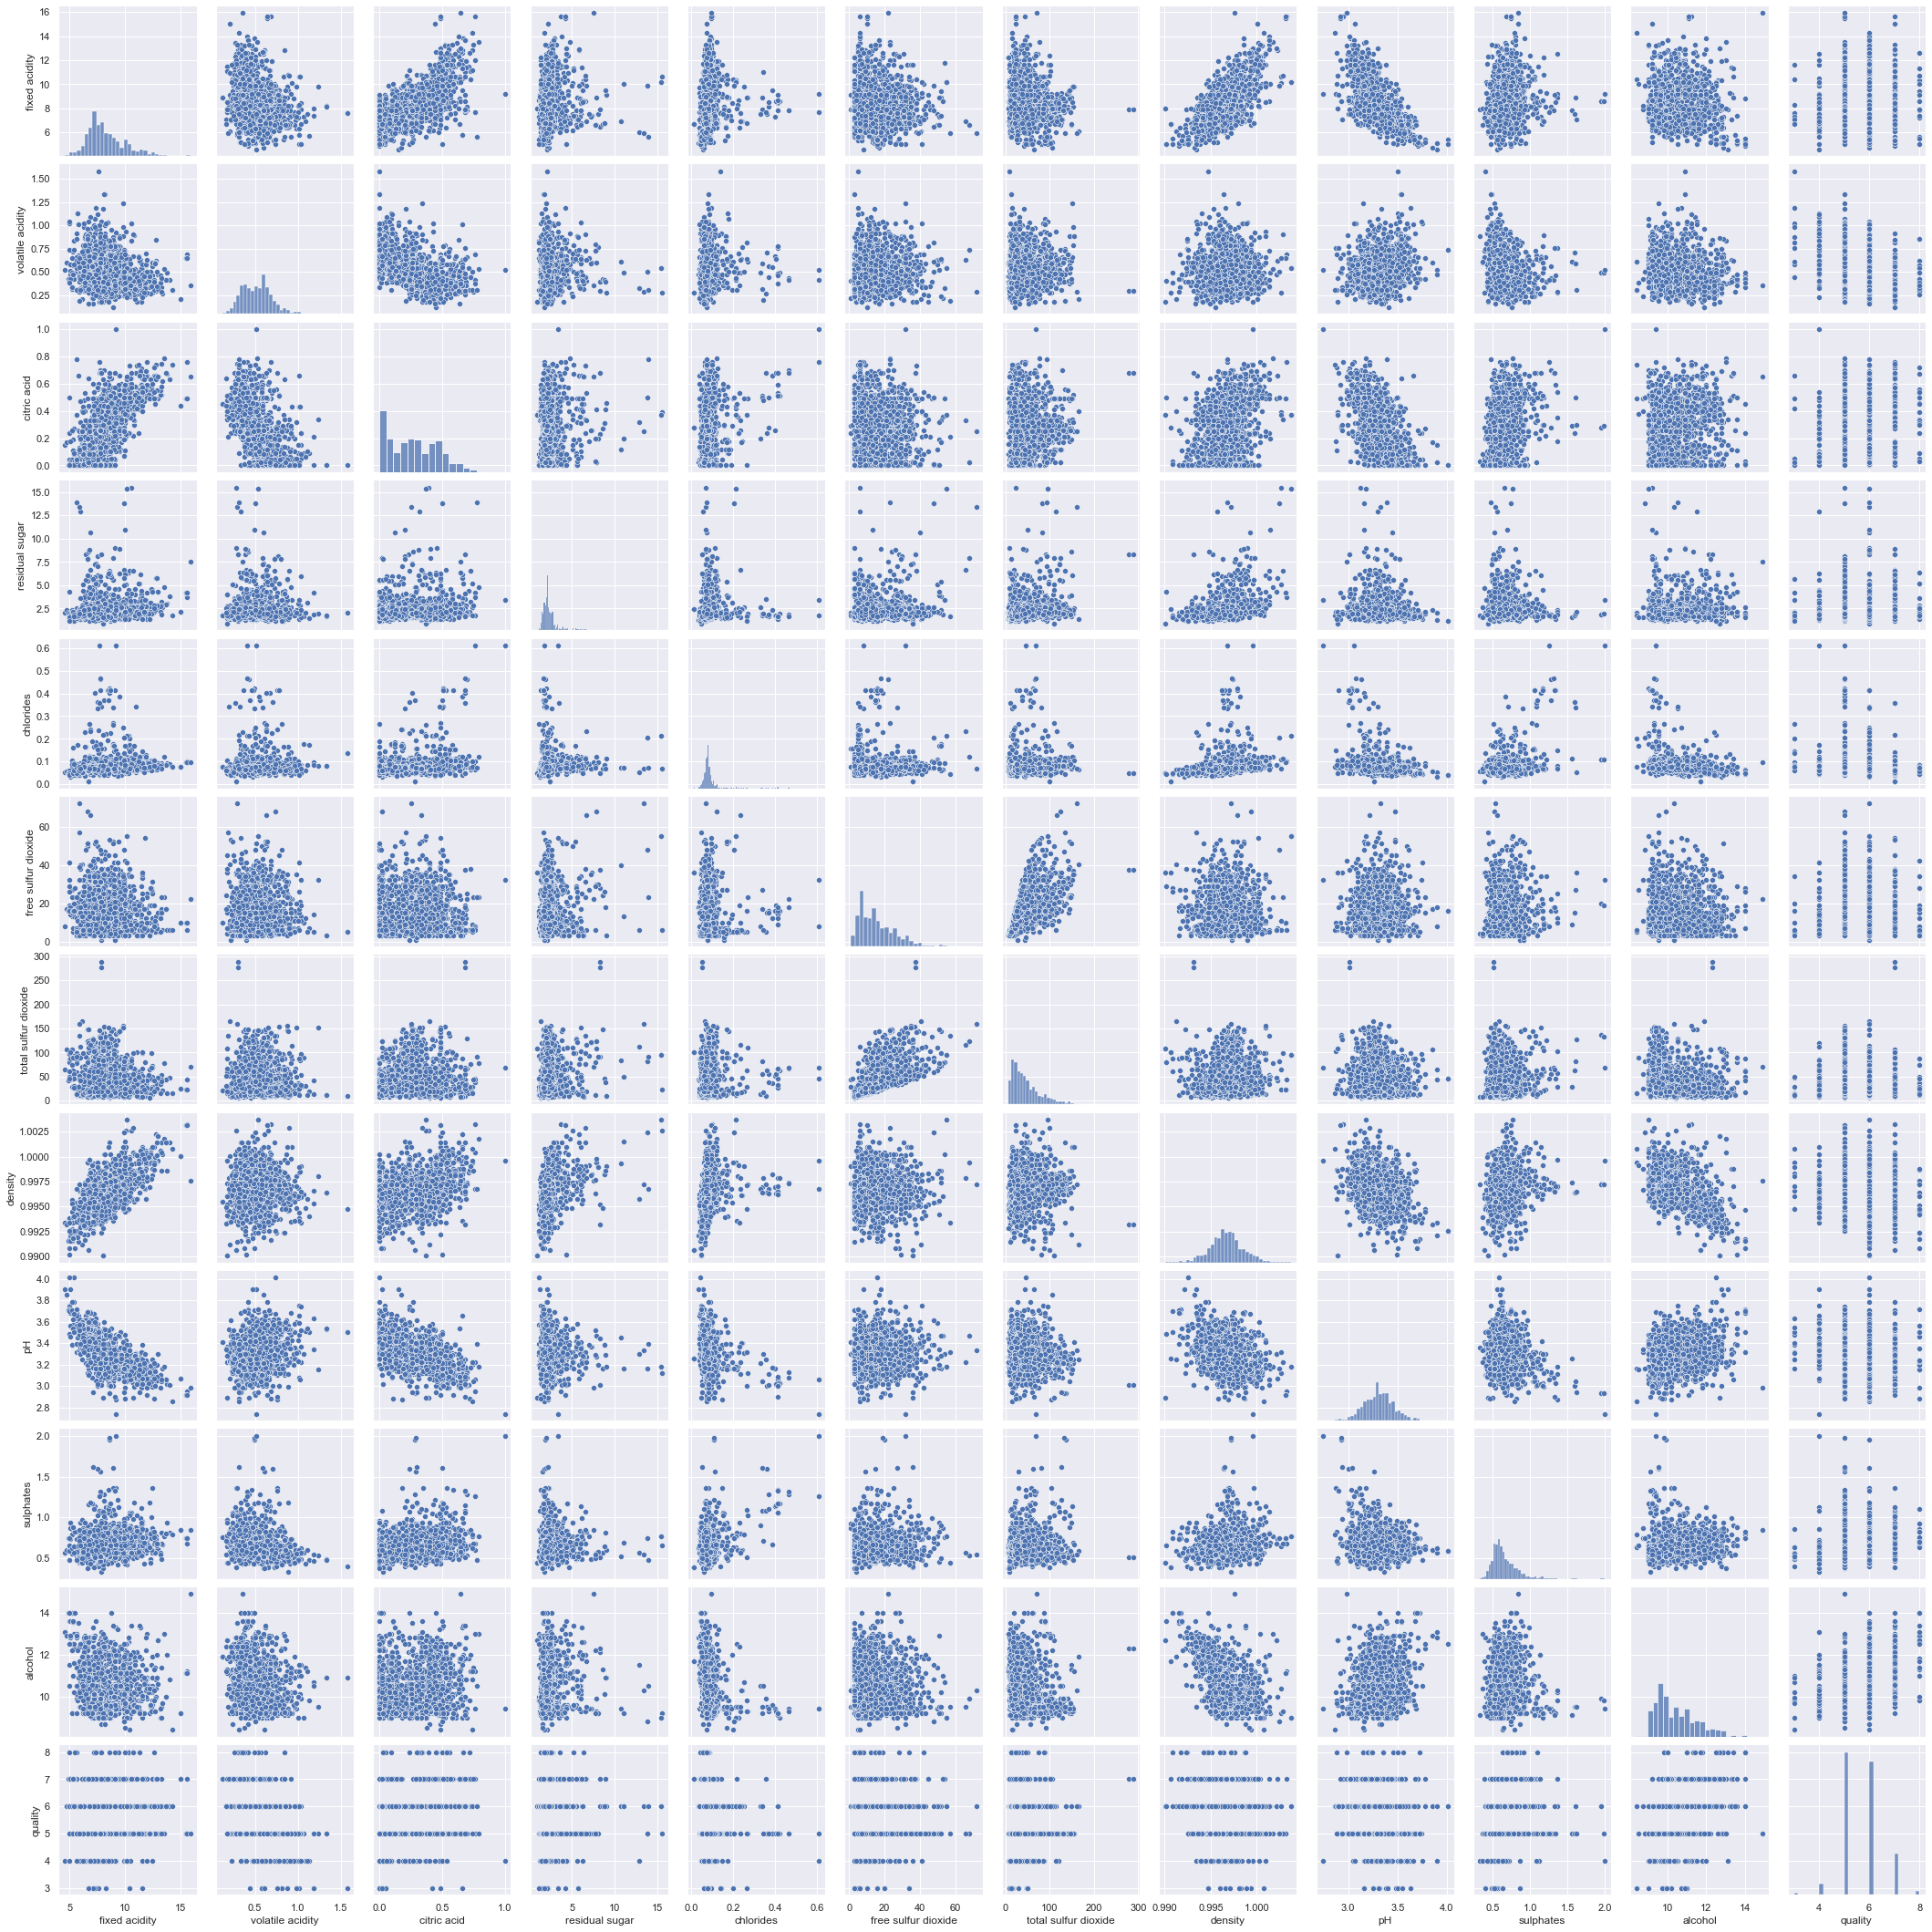

In [10]:
sns.pairplot(train)
plt.show()

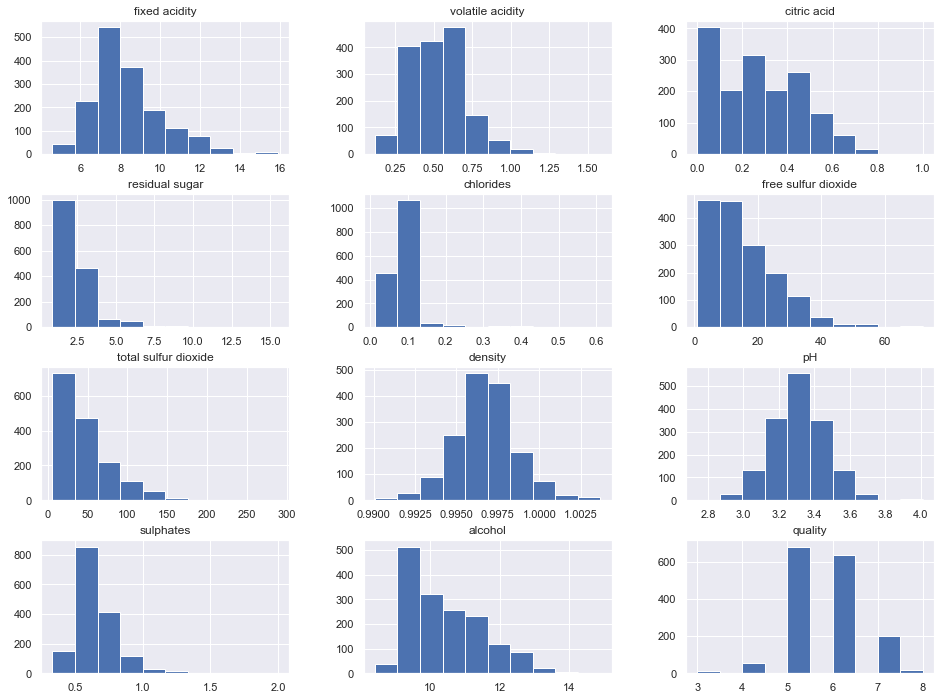

In [11]:
train.hist()
plt.show()

Distribution of Variables

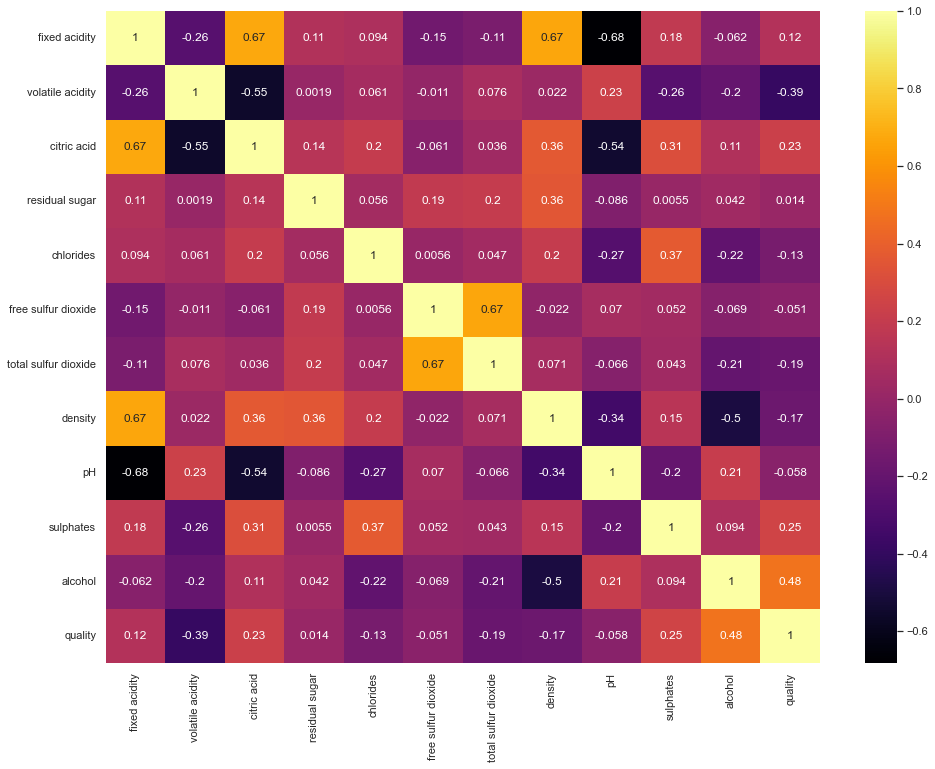

In [12]:
sns.heatmap(train.corr(), annot=True, cmap = "inferno")
plt.show()

Volatile acidity, sulphates, and alcohol have more significate different across different quality based on the heatmap

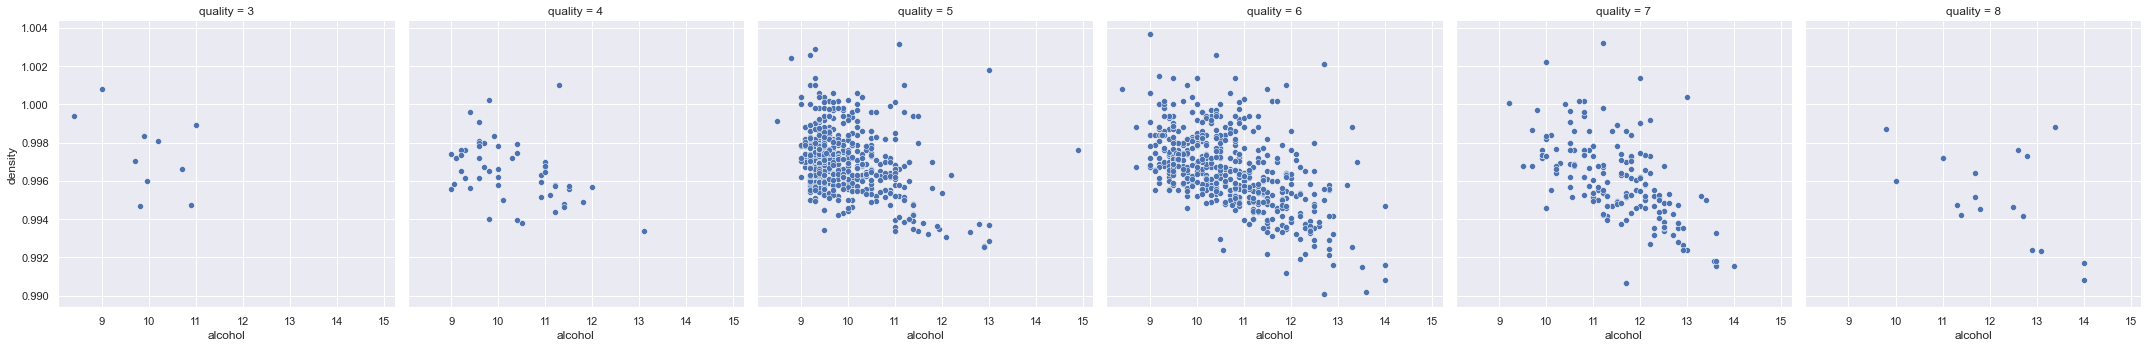

In [13]:
sns.relplot(x = "alcohol", y = "density", data = train, col = "quality")
plt.show()

More alcoholic content and density correlation is found in quality 5 and 6

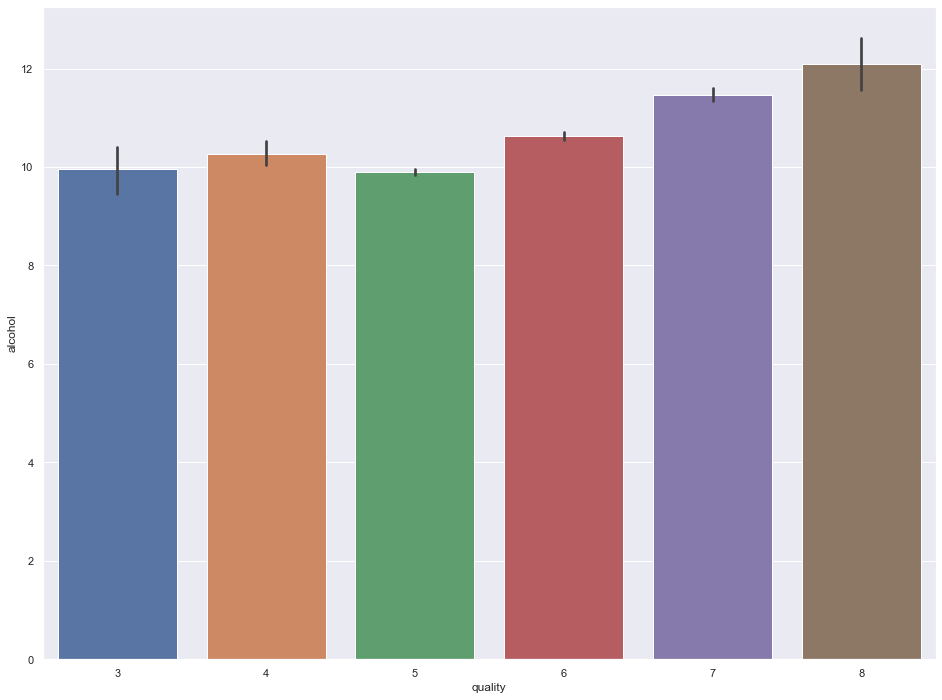

In [14]:
sns.barplot(y = "alcohol", x = "quality", data = train)
plt.show()

The best quality wines have more alcoholic content

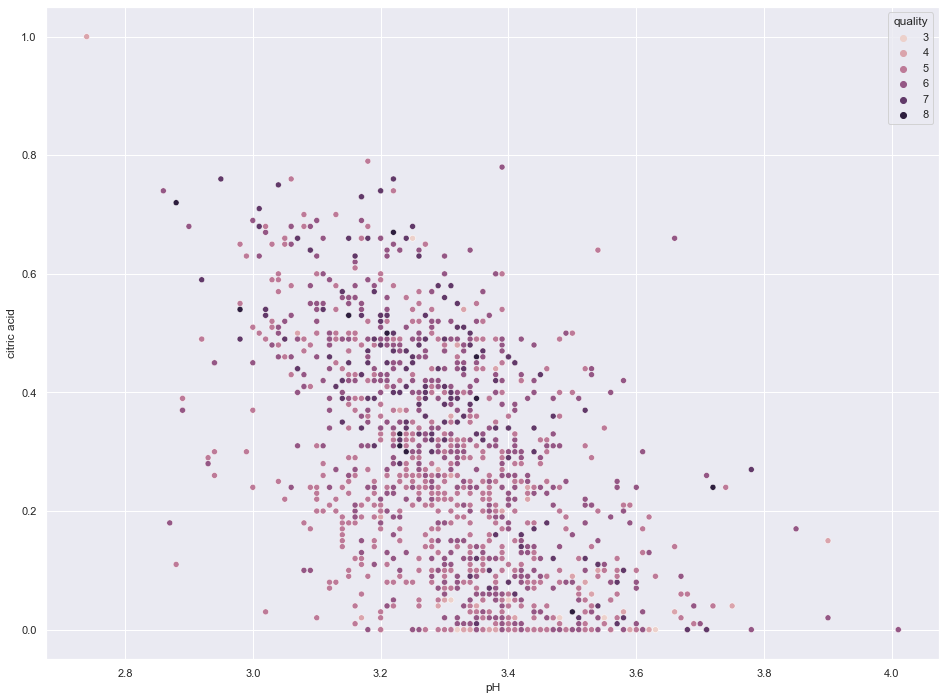

In [15]:
sns.scatterplot(x = "pH", y = "citric acid", data = train, hue = "quality")
plt.show()

As acidity increases pH value decreases

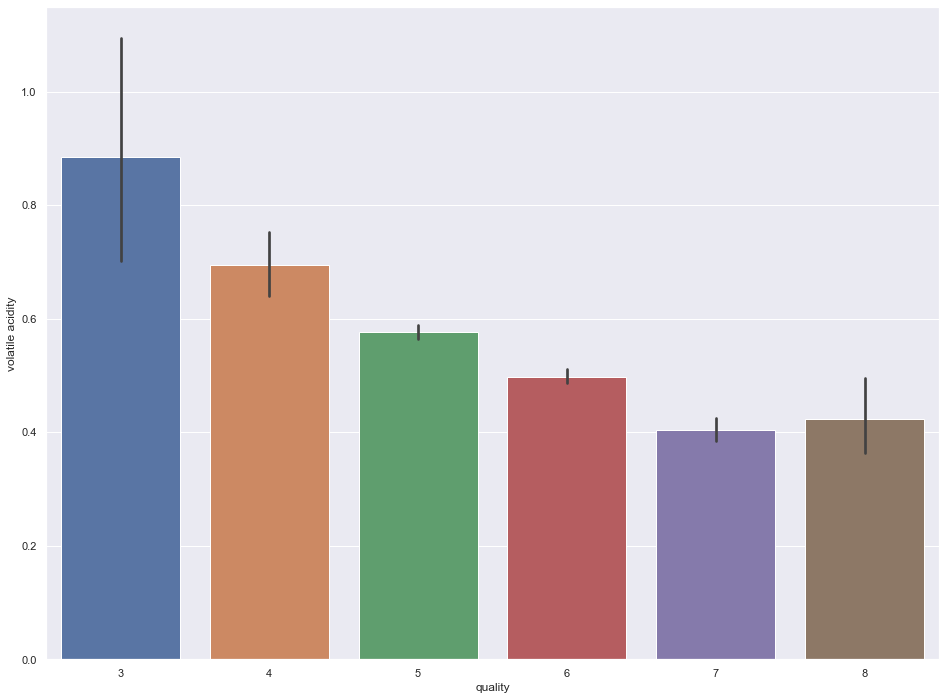

In [16]:
sns.barplot(y = "volatile acidity", x = "quality", data = train)
plt.show()

As volatile acidity increases quality decreases

### Logistic Regression

In [17]:
X = train.drop("quality", axis = 1)

In [18]:
y = train["quality"]

In [19]:
y.value_counts(normalize=True)

5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: quality, dtype: float64

In [20]:
train.groupby("quality").alcohol.describe()

,count,mean,std,min,25%,50%,75%,max
quality,,,,,,,,
3,10.0,9.955000,0.818009,8.4,9.725,9.925,10.575,11.0
4,53.0,10.265094,0.934776,9.0,9.600,10.000,11.000,13.1
5,681.0,9.899706,0.736521,8.5,9.400,9.700,10.200,14.9
6,638.0,10.629519,1.049639,8.4,9.800,10.500,11.300,14.0
7,199.0,11.465913,0.961933,9.2,10.800,11.500,12.100,14.0
8,18.0,12.094444,1.224011,9.8,11.325,12.150,12.875,14.0


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
clf = LogisticRegression(random_state=0)

In [23]:
clf.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [24]:
clf.predict(X_test)

array([5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 6, 5, 5, 5, 5, 6, 5, 5, 6, 5, 6, 5,
       6, 6, 5, 5, 6, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5,
       6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 5, 5, 6, 5, 6, 5, 5, 6, 5, 5, 6, 5,
       6, 5, 6, 5, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 5, 6,
       6, 5, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5,
       6, 5, 6, 5, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 6, 5, 6, 6, 5,
       5, 6, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6,
       6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6,
       6, 5, 5, 5, 5, 6, 5, 7, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 5,
       5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5,
       5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 5, 6, 5,
       6, 6, 6, 5, 6, 5, 6, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 7,
       6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 6,
       5, 6, 5, 6, 5, 7, 5, 5, 5, 6, 5, 6, 6, 6, 5,

In [25]:
np.unique(clf.predict(X_test))

array([5, 6, 7], dtype=int64)

In [26]:
clf.score(X_train, y_train)

0.5910364145658263

In [27]:
clf.score(X_test, y_test)

0.5568181818181818

In [28]:
results = cross_val_score(clf, X, y, scoring='accuracy')

In [29]:
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.575 (0.026)


In [30]:
print(metrics.classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        19
           5       0.63      0.73      0.68       217
           6       0.50      0.63      0.55       213
           7       0.25      0.01      0.03        70
           8       0.00      0.00      0.00         7

    accuracy                           0.56       528
   macro avg       0.23      0.23      0.21       528
weighted avg       0.49      0.56      0.50       528



### Evaluation Metrics

#### Confusion Matrix

Reference - <a href = "https://www.analyticsvidhya.com/blog/2019/08/11-important-model-evaluation-error-metrics/">Link</a>

A confusion matrix is an N X N matrix, where N is the number of classes being predicted. For the problem in hand, we have N=2, and hence we get a 2 X 2 matrix. Here are a few definitions, you need to remember for a confusion matrix :
<ol>
<li>Accuracy : the proportion of the total number of predictions that were correct.
<li>Positive Predictive Value or Precision : the proportion of positive cases that were correctly identified.
<li>Negative Predictive Value : the proportion of negative cases that were correctly identified.
<li>Sensitivity or Recall : the proportion of actual positive cases which are correctly identified.
<li>Specificity : the proportion of actual negative cases which are correctly identified.
</ol>

In [31]:
metrics.confusion_matrix(y_test, clf.predict(X_test))

array([[  0,   0,   2,   0,   0,   0],
       [  0,   0,  10,   9,   0,   0],
       [  0,   0, 159,  57,   1,   0],
       [  0,   0,  78, 134,   1,   0],
       [  0,   0,   5,  64,   1,   0],
       [  0,   0,   0,   6,   1,   0]], dtype=int64)

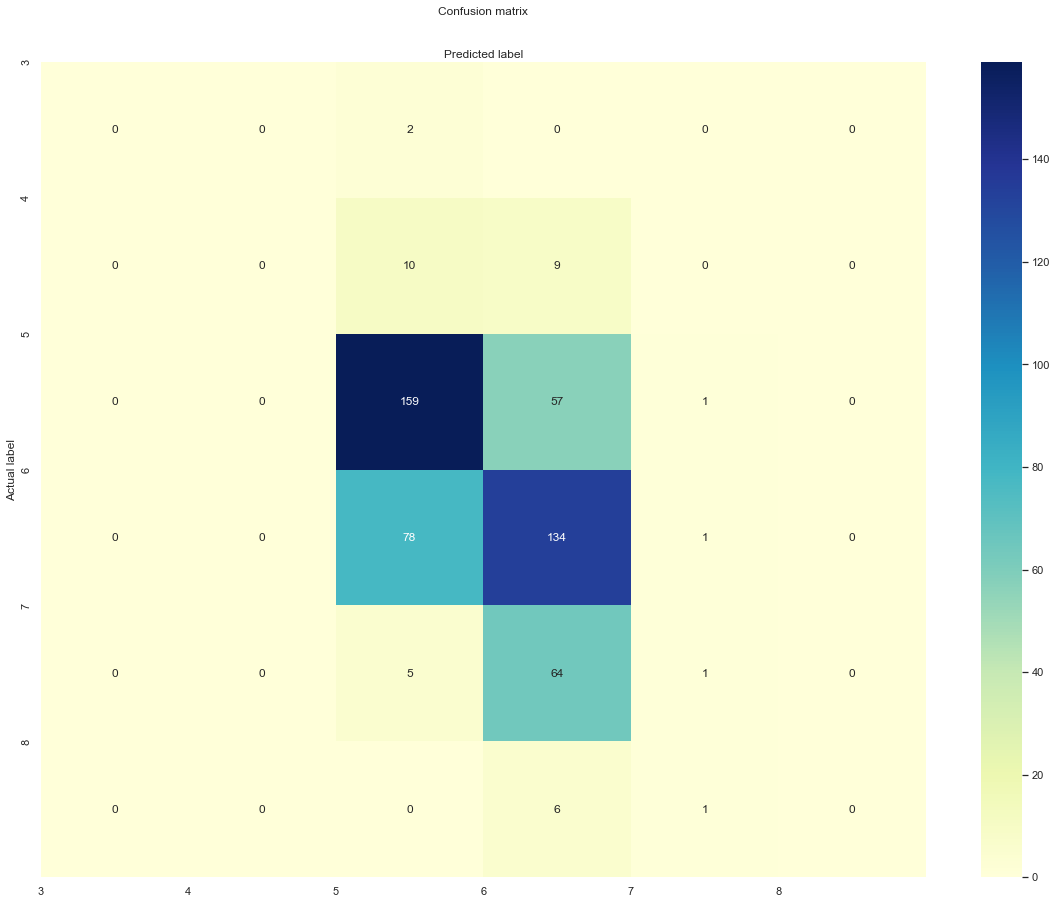

In [32]:
class_names=[3,4,5,6,7,8] # name  of classes
fig, ax = plt.subplots()
# create heatmap
sns.heatmap(metrics.confusion_matrix(y_test, clf.predict(X_test)),annot=True,cmap='YlGnBu', fmt='g')
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.05)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

#### Precision and Recall

In [33]:
print("Accuracy:",metrics.accuracy_score(y_test, clf.predict(X_test)))
print("Precision:",metrics.precision_score(y_test, clf.predict(X_test),average='micro'))
print("Recall:",metrics.recall_score(y_test, clf.predict(X_test),average='micro'))

Accuracy: 0.5568181818181818
Precision: 0.5568181818181818
Recall: 0.5568181818181818


#### F1 Score

Reference - <a href = "https://www.analyticsvidhya.com/blog/2019/08/11-important-model-evaluation-error-metrics/">Link</a>

F1-Score is the harmonic mean of precision and recall values for a classification problem. The formula for F1-Score is as follows:
<img src = "https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/Screenshot-2019-05-14-at-12.12.47-PM.png" width = 500>

In [34]:
metrics.f1_score(y_test, clf.predict(X_test), average='micro')

0.5568181818181818

In [35]:
metrics.f1_score(y_test, clf.predict(X_test), average='macro')

0.20950861452107647

#### Sensitivity and Specificity

Reference: <a href = "https://towardsdatascience.com/evaluating-machine-learning-classification-problems-in-python-5-1-metrics-that-matter-792c6faddf5">Link</a>

Sensitivity is a measure of how well a machine learning model can detect positive instances. It is also known as the true positive rate (TPR) or recall.

Sensitivity (aka Recall) means “out of all actual Positives, how many did we predict as Positive”, which can be explained as:
<br>Sensitivity (Recall) = TP / (FN + TP)

Specificity (aka Selectivity or True Negative Rate, TNR) means “out of all actual Negatives, how many did we predict as Negative”, and can be written as:

Specificity = TN / (TN + FP)

In [36]:
res = []
for l in [3,4,5,6,7,8]:
    prec,recall,_,_ = metrics.precision_recall_fscore_support(np.array(y_test)==l,
                                                      np.array(clf.predict(X_test))==l,
                                                      pos_label=True,average=None)
    res.append([l,recall[0],recall[1]])

In [37]:
pd.DataFrame(res,columns = ['class','sensitivity','specificity'])

,class,sensitivity,specificity
0,3,1.000000,0.000000
1,4,1.000000,0.000000
2,5,0.694534,0.732719
3,6,0.568254,0.629108
4,7,0.993450,0.014286
5,8,1.000000,0.000000


#### Misclassification

Mis-Classification is (1-Accuracy), and means all false predictions over the total number of predictions.

In [38]:
misclassification = 1 - metrics.accuracy_score(y_test, clf.predict(X_test))

In [39]:
print("Mis-Classification Rate: ",misclassification)

Mis-Classification Rate:  0.44318181818181823


#### RUC or AUROC

Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

In [40]:
metrics.roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovo', average='weighted')

0.6753188796953145

In [41]:
metrics.roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovo', average='macro')

0.6401345508033514